In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

In [ ]:
year=2022
tgt_stock="SPY"
trade_freq=2
obs_period=18
intial_wealth=1000

In [ ]:
startdate=str(year)+"-01-01"
enddate=str(year)+"-12-31"
data=yf.download(tgt_stock,start=startdate,end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,461.611725,72668200
2022-01-04,479.220001,479.980011,475.579987,477.549988,461.457153,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,452.596191,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,452.170990,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,450.383331,85111600
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,376.009125,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,374.526367,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,369.871765,70911500


In [ ]:
dates=data.index
closing_prices=data['Close'].values

In [ ]:
dates

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
moving_avg=np.convolve(closing_prices,np.ones(obs_period)/obs_period,mode='valid')

In [ ]:
moving_avg

array([456.94999864, 454.96333313, 453.42777846, 452.57055664,
       451.98222351, 450.89944628, 449.96555752, 448.71611362,
       447.60055881, 447.21222602, 446.3566708 , 445.46611532,
       444.75889248, 444.72278171, 445.20167033, 445.04722595,
       445.03389316, 444.82222663, 444.30611674, 443.54778205,
       442.87222629, 441.96555922, 440.44500393, 439.96111552,
       439.2394477 , 438.40111457, 436.65055847, 434.35666911,
       433.13944668, 432.30722555, 431.25444878, 429.63778178,
       428.50278219, 428.42278205, 428.80278185, 429.63333639,
       430.88000319, 432.06278144, 432.39889187, 433.16889106,
       434.43055725, 435.43166775, 436.8672231 , 438.34111192,
       440.13055759, 442.16778056, 443.80055745, 445.22000122,
       446.68944465, 448.45444404, 449.64333259, 449.88222249,
       449.72777812, 449.66055637, 449.29388936, 448.64833408,
       448.71722412, 448.39611308, 447.58333503, 445.92389086,
       444.08833652, 441.72166951, 439.81222365, 438.41

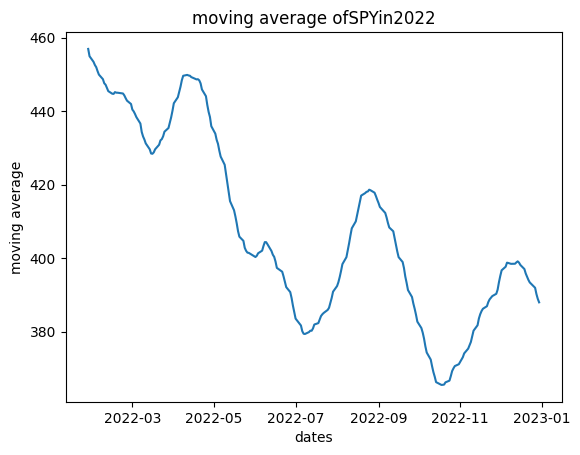

In [ ]:
plt.plot(dates[obs_period-1:],moving_avg)
plt.xlabel('dates')
plt.ylabel('moving average')
plt.title('moving average of'+tgt_stock+'in'+str(year))
plt.show()

In [ ]:
last_trade_dates=[]
current_month=dates[0].month
for i in range(len(dates)):
  if dates[i].month !=current_month:
    last_trade_dates.append(dates[i-1])
    current_month=dates[i].month

last_trade_dates.append(dates[-1])

In [ ]:
last_trade_dates

[Timestamp('2022-01-31 00:00:00'),
 Timestamp('2022-02-28 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-29 00:00:00'),
 Timestamp('2022-05-31 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-29 00:00:00'),
 Timestamp('2022-08-31 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-30 00:00:00')]

In [ ]:
mov_avg_date=[]
for date in last_trade_dates:
  idx=dates.get_loc(date)
  mv_avg=moving_avg[idx-obs_period+1]
  close_val=data.loc[date]['Close']
  temp_list=[date,mv_avg,close_val]
  mov_avg_date.append(temp_list)

In [ ]:
mov_avg_date=np.array(mov_avg_date)
mov_avg_date

array([[Timestamp('2022-01-31 00:00:00'), 453.4277784559461,
        449.9100036621094],
       [Timestamp('2022-02-28 00:00:00'), 441.9655592176649,
        436.6300048828125],
       [Timestamp('2022-03-31 00:00:00'), 440.13055759006073,
        451.6400146484375],
       [Timestamp('2022-04-29 00:00:00'), 435.92833455403644, 412.0],
       [Timestamp('2022-05-31 00:00:00'), 400.57000054253473,
        412.92999267578125],
       [Timestamp('2022-06-30 00:00:00'), 385.2777760823567, 377.25],
       [Timestamp('2022-07-29 00:00:00'), 390.90388997395826,
        411.989990234375],
       [Timestamp('2022-08-31 00:00:00'), 415.9372236463758,
        395.17999267578125],
       [Timestamp('2022-09-30 00:00:00'), 382.750001695421,
        357.17999267578125],
       [Timestamp('2022-10-31 00:00:00'), 371.1711120605469,
        386.2099914550781],
       [Timestamp('2022-11-30 00:00:00'), 393.50111219618054,
        407.67999267578125],
       [Timestamp('2022-12-30 00:00:00'), 388.0044436

In [ ]:
mov_avg_date=np.insert(mov_avg_date,3,'Hold',axis=1)
for i in range(len(mov_avg_date)):
  if mov_avg_date[i][1]>mov_avg_date[i][2]:
    mov_avg_date[i][3]='Buy'
  else:
    mov_avg_date[i][3]='Sell'

print(mov_avg_date)

[[Timestamp('2022-01-31 00:00:00') 453.4277784559461 449.9100036621094
  'Buy']
 [Timestamp('2022-02-28 00:00:00') 441.9655592176649 436.6300048828125
  'Buy']
 [Timestamp('2022-03-31 00:00:00') 440.13055759006073 451.6400146484375
  'Sell']
 [Timestamp('2022-04-29 00:00:00') 435.92833455403644 412.0 'Buy']
 [Timestamp('2022-05-31 00:00:00') 400.57000054253473 412.92999267578125
  'Sell']
 [Timestamp('2022-06-30 00:00:00') 385.2777760823567 377.25 'Buy']
 [Timestamp('2022-07-29 00:00:00') 390.90388997395826 411.989990234375
  'Sell']
 [Timestamp('2022-08-31 00:00:00') 415.9372236463758 395.17999267578125
  'Buy']
 [Timestamp('2022-09-30 00:00:00') 382.750001695421 357.17999267578125
  'Buy']
 [Timestamp('2022-10-31 00:00:00') 371.1711120605469 386.2099914550781
  'Sell']
 [Timestamp('2022-11-30 00:00:00') 393.50111219618054 407.67999267578125
  'Sell']
 [Timestamp('2022-12-30 00:00:00') 388.00444369845917 382.42999267578125
  'Buy']]


In [ ]:
buy_dates=[]
for row in mov_avg_date:
  if row[3]=='Buy':
    buy_dates.append(row)
buy_dates=np.array(buy_dates)
buy_dates

array([[Timestamp('2022-01-31 00:00:00'), 453.4277784559461,
        449.9100036621094, 'Buy'],
       [Timestamp('2022-02-28 00:00:00'), 441.9655592176649,
        436.6300048828125, 'Buy'],
       [Timestamp('2022-04-29 00:00:00'), 435.92833455403644, 412.0,
        'Buy'],
       [Timestamp('2022-06-30 00:00:00'), 385.2777760823567, 377.25,
        'Buy'],
       [Timestamp('2022-08-31 00:00:00'), 415.9372236463758,
        395.17999267578125, 'Buy'],
       [Timestamp('2022-09-30 00:00:00'), 382.750001695421,
        357.17999267578125, 'Buy'],
       [Timestamp('2022-12-30 00:00:00'), 388.00444369845917,
        382.42999267578125, 'Buy']], dtype=object)

In [ ]:
sell_dates=[]
for row in mov_avg_date:
  if row[3]=='Sell':
    sell_dates.append(row)
sell_dates=np.array(sell_dates)
sell_dates

array([[Timestamp('2022-03-31 00:00:00'), 440.13055759006073,
        451.6400146484375, 'Sell'],
       [Timestamp('2022-05-31 00:00:00'), 400.57000054253473,
        412.92999267578125, 'Sell'],
       [Timestamp('2022-07-29 00:00:00'), 390.90388997395826,
        411.989990234375, 'Sell'],
       [Timestamp('2022-10-31 00:00:00'), 371.1711120605469,
        386.2099914550781, 'Sell'],
       [Timestamp('2022-11-30 00:00:00'), 393.50111219618054,
        407.67999267578125, 'Sell']], dtype=object)

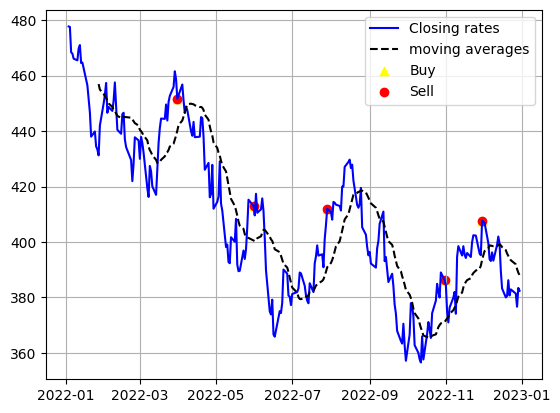

In [ ]:
fig,ax=plt.subplots()
ax.plot(dates,closing_prices,color='blue',label='Closing rates')
ax.plot(dates[obs_period-1:],moving_avg,color='black',linestyle='--',label='moving averages')
ax.scatter(buy_dates[:,0],buy_dates[:,2],c='yellow',marker='^',label='Buy')
ax.scatter(sell_dates[:,0],sell_dates[:,2],c='red',marker='o',label='Sell')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
trade_dates = mov_avg_date[trade_freq-1::trade_freq]
for row in trade_dates:
  print(row)

[Timestamp('2022-02-28 00:00:00') 441.9655592176649 436.6300048828125
 'Buy']
[Timestamp('2022-04-29 00:00:00') 435.92833455403644 412.0 'Buy']
[Timestamp('2022-06-30 00:00:00') 385.2777760823567 377.25 'Buy']
[Timestamp('2022-08-31 00:00:00') 415.9372236463758 395.17999267578125
 'Buy']
[Timestamp('2022-10-31 00:00:00') 371.1711120605469 386.2099914550781
 'Sell']
[Timestamp('2022-12-30 00:00:00') 388.00444369845917 382.42999267578125
 'Buy']


In [ ]:
initial_wealth = 1000

for i in range(len(trade_dates)-1):
  current_close = trade_dates[i][2]
  next_close = trade_dates[i + 1][2]
  print('Current Close Amount : ',current_close)
  print('Next Close Amount : ',next_close)
  if trade_dates[i][3] == 'Buy':
    profit_per_share = current_close - next_close
  else:
    profit_per_share = next_close - current_close

  print('Profit Per Share:',profit_per_share)

  total_shares = initial_wealth / current_close
  print('Total Shares to buy/sell:',total_shares)

  profit = total_shares * profit_per_share
  print('Profit :',profit)

  initial_wealth += profit
  print(f"Current wealth: {initial_wealth:.2f}")
  print('++++++++++++++++++++++++')

print(f"Final wealth: {initial_wealth:.2f}")

Current Close Amount :  436.6300048828125
Next Close Amount :  412.0
Profit Per Share: 24.6300048828125
Total Shares to buy/sell: 2.2902686229005056
Profit : 56.40932736499171
Current wealth: 1056.41
++++++++++++++++++++++++
Current Close Amount :  412.0
Next Close Amount :  377.25
Profit Per Share: 34.75
Total Shares to buy/sell: 2.5641003091383294
Profit : 89.10248574255695
Current wealth: 1145.51
++++++++++++++++++++++++
Current Close Amount :  377.25
Next Close Amount :  395.17999267578125
Profit Per Share: -17.92999267578125
Total Shares to buy/sell: 3.036479292531607
Profit : -54.44405147525314
Current wealth: 1091.07
++++++++++++++++++++++++
Current Close Amount :  395.17999267578125
Next Close Amount :  386.2099914550781
Profit Per Share: 8.970001220703125
Total Shares to buy/sell: 2.760938766774672
Profit : 24.765624108255388
Current wealth: 1115.83
++++++++++++++++++++++++
Current Close Amount :  386.2099914550781
Next Close Amount :  382.42999267578125
Profit Per Share: -3.7